In [23]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the code.">
 </form>'
)

# Table of contents
1. [Marketing Mix Modelling Overview](#introduction)
    1. [Adstock | Carry-over effect](#subparagraph1)
    2. [Mutiple Advertisement variables](#subparagraph2)
    3. [Adding seasonality | Trend](#subparagraph3)
    4. [Adding non-linear advertising effect](#subparagraph4)


2. [Popular regression model used](#paragraph2)
    1. [Additive model](#sparagraph1)
    2. [Multiplicative model](#sparagraph2)
    

3. [Advanced methodologies used](#paragraph3)
    1. [MCMC - Markov chain Monte Carlo](#3paragraph1)

## 1. MMM Overview <a name="introduction"></a>

The key purpose of a Marketing Mix Model is to understand how various marketing activities are driving the business metrics of a product.It is basically a process used to quantify the effects of different advertising mediums. It is also used to optimize spend budget amonngst these mediums.

The most popular methodology used to model is multiple regression analysis.

Understanding MMM using simple example: 

Assuming there is only one advertising medium that impact a company's sale, the regression equation can be expressed as following:

***Sales = Base + b1·Advertising1 + e***

Here base is the outcome that is achieved without any advertisements. It could be brand equity built over the years. Base outcomes are usually fixed unless there are any radical economic or environmental changes.


Call:
lm(formula = sales ~ ad)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.994 -14.317  -5.677   7.628  66.420 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  91.3348     9.6356   9.479 2.02e-08 ***
ad            1.6098     0.7882   2.042    0.056 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.61 on 18 degrees of freedom
Multiple R-squared:  0.1881,	Adjusted R-squared:  0.143 
F-statistic: 4.172 on 1 and 18 DF,  p-value: 0.05604


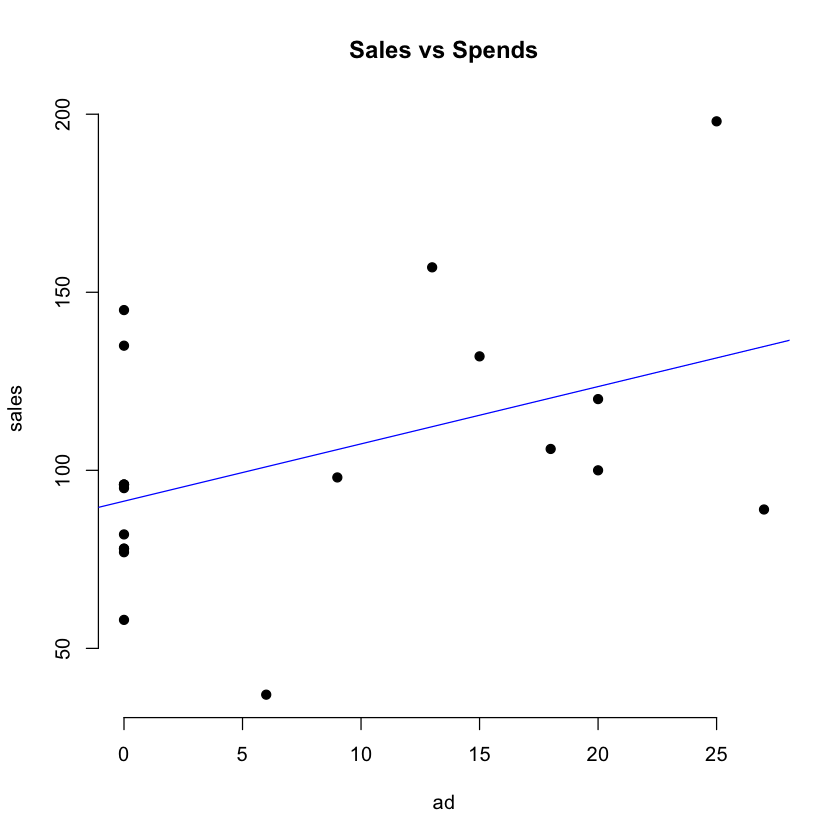

In [1]:
sales <- c(37, 89, 82, 58, 120, 77, 100, 78, 95, 106, 98, 96, 78, 96, 157, 198, 145, 132, 96, 135)
ad <- c(6, 27, 0, 0, 20, 0, 20, 0, 0, 18, 9, 0, 0, 0, 13, 25, 0, 15, 0, 0)


plot(ad, sales, main = "Sales vs Spends",
     xlab = "ad", ylab = "sales",
     pch = 19, frame = FALSE)
abline(lm(sales ~ ad), col = "blue")

modFit.0 <- lm(sales~ad)
summary(modFit.0)

The model has R square of 0.1881, that means more work needs to be done

### Adstock | Carry-over effect <a name="subparagraph1"></a>

Adstock is simply the carry-over effect of advertising or in other words it's the memory effect of advertising. The theory behind adstock is that marketing exposures build awareness in consumers’ minds.  That awareness doesn’t disappear right after the consumers see the ad but rather remains in their memory.  Memory decays over the weeks and hence the decay portion of adstock.

This can be expressed as ***At = Xt + adstock rate * At-1***

Hence, the advertisement variable needs to be transformed while modelling to account for this effect.

So Our new regression equation can be written as following:

***Sales = Base + b1·f(Advertising|α)***

Here f() is a the adstock transformation function for the advertising variable given an adstock of α (normally between 0 and 1)

*Assuming adstock factor as 0.50*


Call:
lm(formula = sales ~ ad.adstock)

Residuals:
   Min     1Q Median     3Q    Max 
-46.84 -20.57 -10.54  14.16  59.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.2232    14.7331   4.834 0.000133 ***
ad.adstock    2.1034     0.8538   2.464 0.024057 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.49 on 18 degrees of freedom
Multiple R-squared:  0.2522,	Adjusted R-squared:  0.2106 
F-statistic: 6.069 on 1 and 18 DF,  p-value: 0.02406


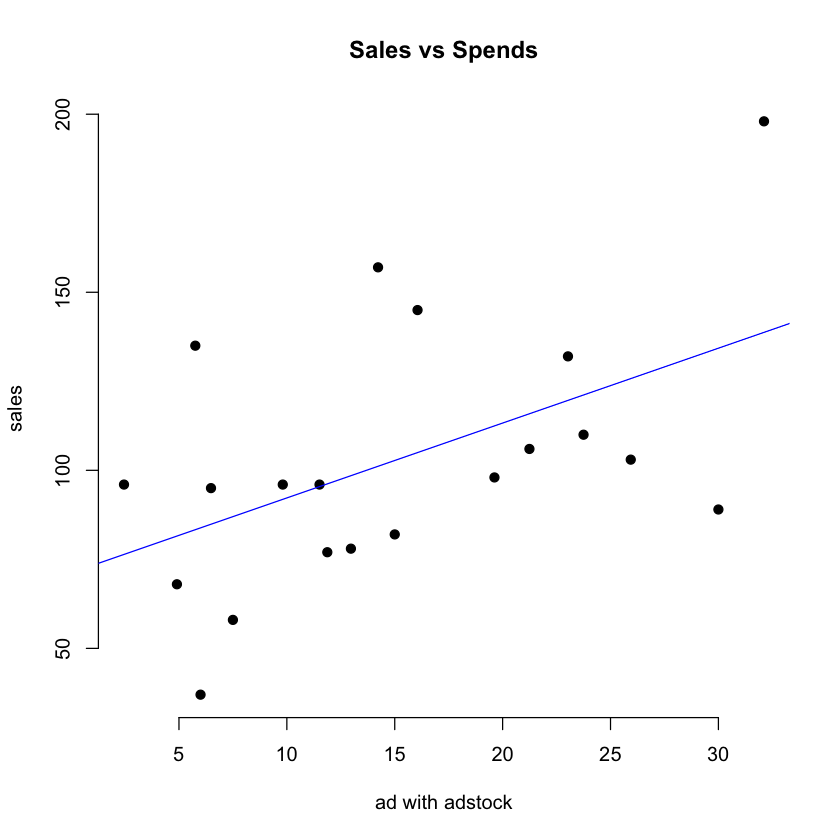

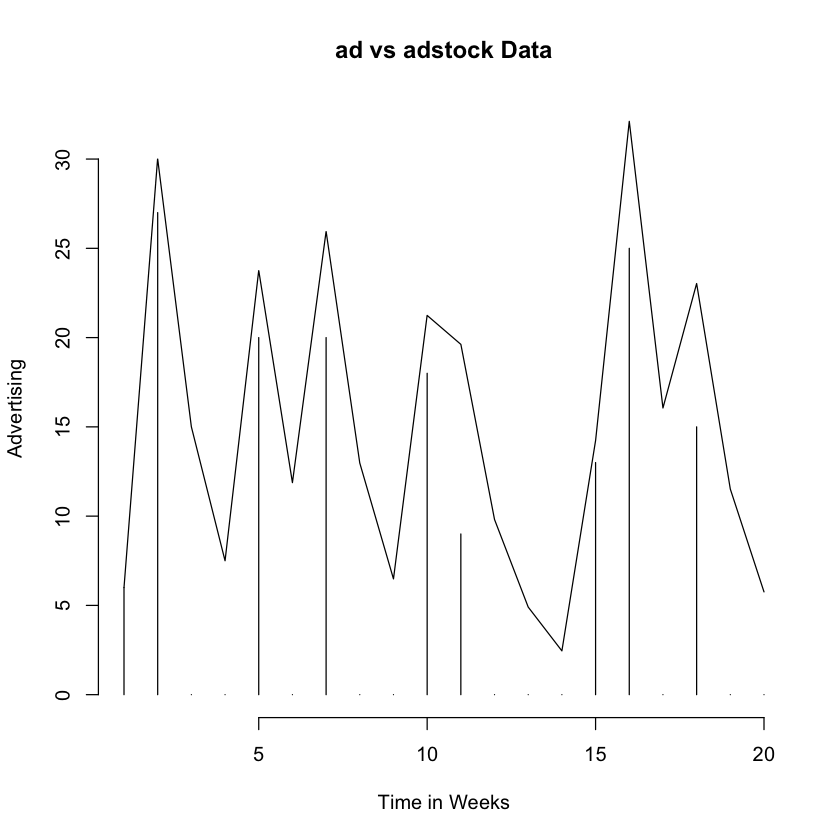

In [2]:
sales <- c(37, 89, 82, 58, 110, 77, 103, 78, 95, 106, 98, 96, 68, 96, 157, 198, 145, 132, 96, 135)
ad <- c(6, 27, 0, 0, 20, 0, 20, 0, 0, 18, 9, 0, 0, 0, 13, 25, 0, 15, 0, 0)

ad.adstock <- as.numeric(filter(x=ad, filter=.50, method="recursive"))

modFit.1 <- lm(sales~ad.adstock)
summary(modFit.1)

plot(ad.adstock, sales, main = "Sales vs Spends",
     xlab = "ad with adstock", ylab = "sales",
     pch = 19, frame = FALSE)
abline(lm(sales ~ ad.adstock), col = "blue")

# Graph ad vs adstock Data
plot(seq(1,length(ad)), ad, type="h", main = "ad vs adstock Data", 
     xlab="Time in Weeks", ylab="Advertising", 
     ylim=c(0, max(c(ad, ad.adstock))),
     frame.plot=FALSE)
lines(ad.adstock)

### Mutiple Advertisement variables <a name="subparagraph2"></a>

Advertising can be a paid media channel like TV, radio or banner ads, a non-paid media variable like social impressions or word-of-mouth, or a marketing campaign. Adding more advertising variables doesn't have to be same unit of measure. Many measures can be used including TRPs, GRPs, impressions or spend.

On adding an extra advertisement variable, the new equation will be:

***Sales = Base + b1·f(Advertising1|α1) + b2·f(Advertising2|α2) + e***

Each media channel has their own adstock

In [3]:
ad1 <- c(6, 27, 0, 0, 20, 0, 20, 0, 0, 18, 9, 0, 0, 0, 13, 25, 0, 15, 0, 0)
ad2 <- c(3, 0, 4, 0, 5, 0, 0, 0, 8, 0, 0, 5, 0, 11, 16, 11, 5, 0, 0, 15)

ad1.adstock <- as.numeric(filter(x=ad1, filter=.3, method="recursive"))
ad2.adstock <- as.numeric(filter(x=ad2, filter=.3, method="recursive"))

modFit2 <- lm(sales~ad1.adstock+ad2.adstock)
summary(modFit2)


Call:
lm(formula = sales ~ ad1.adstock + ad2.adstock)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.791 -10.432   2.156   8.657  28.317 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  56.8937     7.6794   7.409 1.02e-06 ***
ad1.adstock   1.8808     0.4681   4.018 0.000892 ***
ad2.adstock   4.5375     0.7163   6.335 7.47e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.56 on 17 degrees of freedom
Multiple R-squared:  0.7694,	Adjusted R-squared:  0.7423 
F-statistic: 28.36 on 2 and 17 DF,  p-value: 3.837e-06


***The model is stronger than before with R-squared 0.7694***

### Adding Trend | seasonality to the equation <a name="subparagraph3"></a>

The above examples assumed constant base, but in reality base is usually not constant as it might include seasonality or trend. Normally base is more than intercept. If increasing trend or seasonlity in Sales is noticed, then part of modeling is to create a trend variable.

Hence, the new equation with trends would be :

***Sales = Base + b1.Trend + b2·f(Advertising1|α1) + b3·f(Advertising2|α2) + e***

*Finally other variables that are important and normally added to the MMM are pricing, special promotions, competition impact, demand and many more*

In [6]:
trend <- 1:20 

modFit.3 <- lm(sales~trend+ad1.adstock+ad2.adstock)
summary(modFit.3)


Call:
lm(formula = sales ~ trend + ad1.adstock + ad2.adstock)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.661  -5.723   1.234   6.537  14.065 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.6649     5.5836   5.492 4.92e-05 ***
trend         3.0271     0.4467   6.776 4.45e-06 ***
ad1.adstock   2.1706     0.2490   8.718 1.79e-07 ***
ad2.adstock   2.9819     0.4400   6.777 4.44e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.727 on 16 degrees of freedom
Multiple R-squared:  0.9404,	Adjusted R-squared:  0.9292 
F-statistic: 84.17 on 3 and 16 DF,  p-value: 5.165e-10


***Final model Rsquared - 0.94***

### Adding non-linear advertising effect <a name="subparagraph4"></a>

All the above MMM example assumed that sales and advertisement has linear relationship, although in real world it's a low possibility scenario. 

Establishing non linear effect of advertising is far more complex than accounting for adstock in the model. This is because of 2 properties attached to advertisement
1. Diminishing effect of advertising - which means that advertising exhibits non-constant and a decreasing marginal return
2. Saturation point - Point where advertisement has near 0 impact

These non-linear effects of advertisement can be mapped to the ad variables by several mathematical functions. Some of the most popular functions that are used in the industry are:
1. Power Curve - Mostly used for digital channels like Display, Video
2. S-Curve - Mostly used for tradional channels like TV, OOH

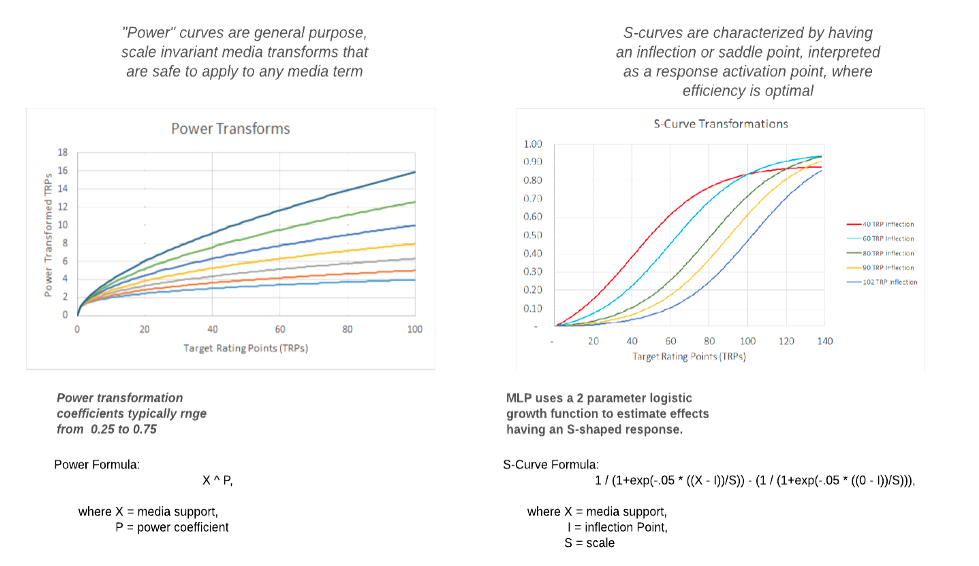

In [21]:
library("IRdisplay")
display_png(file="/Users/adityakamboj/Desktop/Screen\ Shot\ 2020-11-15\ at\ 5.07.16\ PM.png") 

## 2. Popular regression model used <a name="paragraph2"></a>

### Additive model <a name="sparagraph1"></a>

All the above examples showcased additive model. 

It's a model in which the effects of individual factors are differentiated and added together to model the data.Additive model is used when the magnitude of the seasonal pattern in the data does not depend on the magnitude of the data. In other words, the magnitude of the seasonal pattern does not change as the series goes up or down.

***Sales = Intercept + β1·Advertising + e***

1. Data is represented in terms of addition of seasonality, trend, cyclical and residual components

2. Used where change is measured in absolute quantity

3. Data is modeled as-is

### Mutiplicative model <a name="sparagraph2"></a>

Multiplicative model is used when the magnitude of the seasonal pattern in the data depends on the magnitude of the data. In other words, the magnitude of the seasonal pattern increases as the data values increase, and decreases as the data values decrease. ***Used at mediabrands***

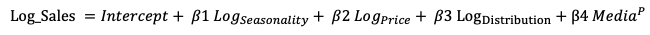

1. Data is represented in terms of multiplication of seasonality, trend, cyclical and residual components

2. Data is modeled just as additive but after taking logarithm

## 3. Other advanced methodologies used  <a name="paragraph3"></a>

### MCMC - Markov chain Monte Carlo <a name="3paragraph1"></a>

#### Easiest & notation free explanation found online

First, we need to understand what is a Markov chain. Consider the following weather example from Wikipedia. Suppose that weather on any given day can be classified into two states only: sunny and rainy. Based on past experience, we know the following:

𝑃(Next day is Sunny|Given today is Rainy)=0.50
Since, the next day's weather is either sunny or rainy it follows that:

𝑃(Next day is Rainy|Given today is Rainy)=0.50
Similarly, let:

𝑃(Next day is Rainy|Given today is Sunny)=0.10
Therefore, it follows that:

𝑃(Next day is Sunny|Given today is Sunny)=0.90
The above four numbers can be compactly represented as a transition matrix which represents the probabilities of the weather moving from one state to another state as follows:

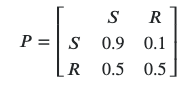

We might ask several questions whose answers follow:

Q1: If the weather is sunny today then what is the weather likely to be tomorrow?

A1: Since, we do not know what is going to happen for sure, the best we can say is that there is a 90% chance that it is likely to be sunny and 10% that it will be rainy.


We might ask several questions whose answers follow:

Q1: If the weather is sunny today then what is the weather likely to be tomorrow?

A1: Since, we do not know what is going to happen for sure, the best we can say is that there is a 90% chance that it is likely to be sunny and 10% that it will be rainy.

Q2: What about two days from today?

A2: One day prediction: 90% sunny, 10% rainy. Therefore, two days from now:

First day it can be sunny and the next day also it can be sunny. Chances of this happening are: 0.9×0.9.

Or

First day it can be rainy and second day it can be sunny. Chances of this happening are: 0.1×0.5.

Therefore, the probability that the weather will be sunny in two days is:

𝑃(Sunny 2 days from now=0.9×0.9+0.1×0.5=0.81+0.05=0.86

Similarly, the probability that it will be rainy is:

𝑃(Rainy 2 days from now=0.1×0.5+0.9×0.1=0.05+0.09=0.14

In linear algebra (transition matrices) these calculations correspond to all the permutations in transitions from one step to the next (sunny-to-sunny (𝑆2𝑆), sunny-to-rainy (𝑆2𝑅), rainy-to-sunny (𝑅2𝑆) or rainy-to-rainy (𝑅2𝑅)) with their calculated probabilities:

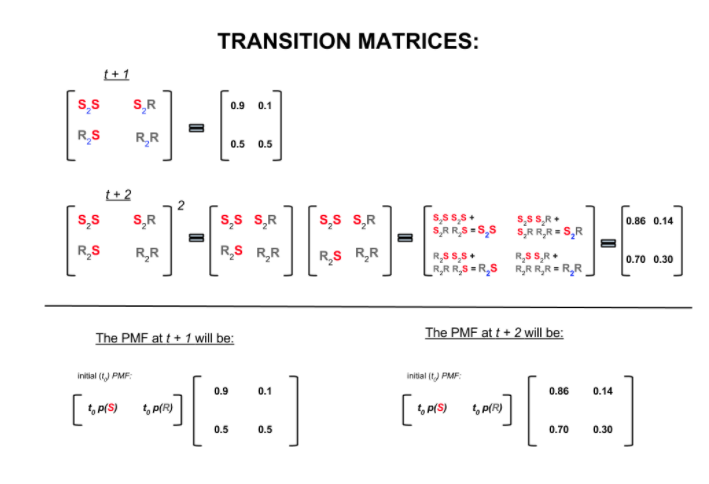


On the lower part of the image we see how to calculate the probability of a future state (𝑡+1 or 𝑡+2) given the probabilities (probability mass function, 𝑃𝑀𝐹) for every state (sunny or rainy) at time zero (now or 𝑡0) as simple matrix multiplication.

If you keep forecasting weather like this you will notice that eventually the 𝑛-th day forecast, where 𝑛 is very large (say 30), settles to the following 'equilibrium' probabilities:

𝑃(Sunny)=0.833
and

𝑃(Rainy)=0.167
In other words, your forecast for the 𝑛-th day and the 𝑛+1-th day remain the same. In addition, you can also check that the 'equilibrium' probabilities do not depend on the weather today. You would get the same forecast for the weather if you start of by assuming that the weather today is sunny or rainy.

The above example will only work if the state transition probabilities satisfy several conditions which I will not discuss here. But, notice the following features of this 'nice' Markov chain (nice = transition probabilities satisfy conditions):

Irrespective of the initial starting state we will eventually reach an equilibrium probability distribution of states.

Markov Chain Monte Carlo exploits the above feature as follows:

We want to generate random draws from a target distribution. We then identify a way to construct a 'nice' Markov chain such that its equilibrium probability distribution is our target distribution.

If we can construct such a chain then we arbitrarily start from some point and iterate the Markov chain many times (like how we forecast the weather 𝑛 times). Eventually, the draws we generate would appear as if they are coming from our target distribution.

We then approximate the quantities of interest (e.g. mean) by taking the sample average of the draws after discarding a few initial draws which is the Monte Carlo component.